<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Project 2 - Ames Housing Data and Kaggle Challenge
(Part 1 of 3)


---

### Part One: 
1. Problem Statement
2. Data Cleaning and EDA

### Problem Statement

Property flipping is an investment strategy. All investments have risks.

To help novice property flippers manage risks, we will provide consultation upon application, based on our home valuation application that predicts the sale prices of homes in Ames, Iowa. We have modeled Linear Regression, Ridge, Lasso and Grid Search models. The sale price prediction is also helpful for property buyers or sellers.

To better manage risks for new property flippers, we recommend the Reno Flip. The reno flip, in which a property flipper improves undervalued properties with renovations and/or cosmetic changes, is deemed less risky. 

Thus, our recommendations will focus on features that are more likely to increase property value when renovated, and which features to de-prioritise.


### Data Import and Cleaning

**Step 1: Reading the Data.**

In [43]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#set_style
plt.style.use('fivethirtyeight')
#configure for retina display
%config InlineBackend.figure_format = 'retina'

In [44]:
# Read the data.
train = pd.read_csv('datasets/train.csv')
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [45]:
# Checking the dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

There are many feature columns. I will likely need to narrow down to relevant ones. Because of the extensive number of features, it's taxing to go through each to determine if the dtype is correct. I will return to this later when necessary.  
Also there are many missing values which I'll need to decide whether to drop rows/ impute values in and if so, which method to use.

In [46]:
# Describing the data to see what other oddities I can pick out.
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


With an overall glance, the numbers seem reasonable for now. I did spot some extreme anomalies when comparing the min and max values of the rows. I shall return to this further down.

**Step 2: Cleaning the Data.**

Putting the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) link here for easy access. 

In [47]:
# Identifying the column names.
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

**Dropping columns** 
1) 'Mo Sold', 'Yr Sold' because these are datetime elements that will mess up the data later when I do a train-test split. Also because of the nature of our business which is to encourage clients to buy/ sell property for a gain by looking into the features of a property, I am leaving out such time based elements to rule out other influencing factors that are beyond our control.   

2) 'Sale Type' because it is a factor based on the US housing law that will require deeper research to check if it has any effect on the sale price. For now, I think it's wiser to leave it out in the analysis.  

3) 'Pool QC' because there are far too many missing values to be of any use in the analysis. 

In [48]:
# Drop the abovementioned columns.
train = train.drop(columns = ['Mo Sold', 'Yr Sold', 'Sale Type', 'Pool QC'])

As there are still far too many missing values in our data, I need to analyse further how else to clean up:  

<u>Basement</u>  

I noticed many features relating to the basement so I want to do a pairplot to make some observations.

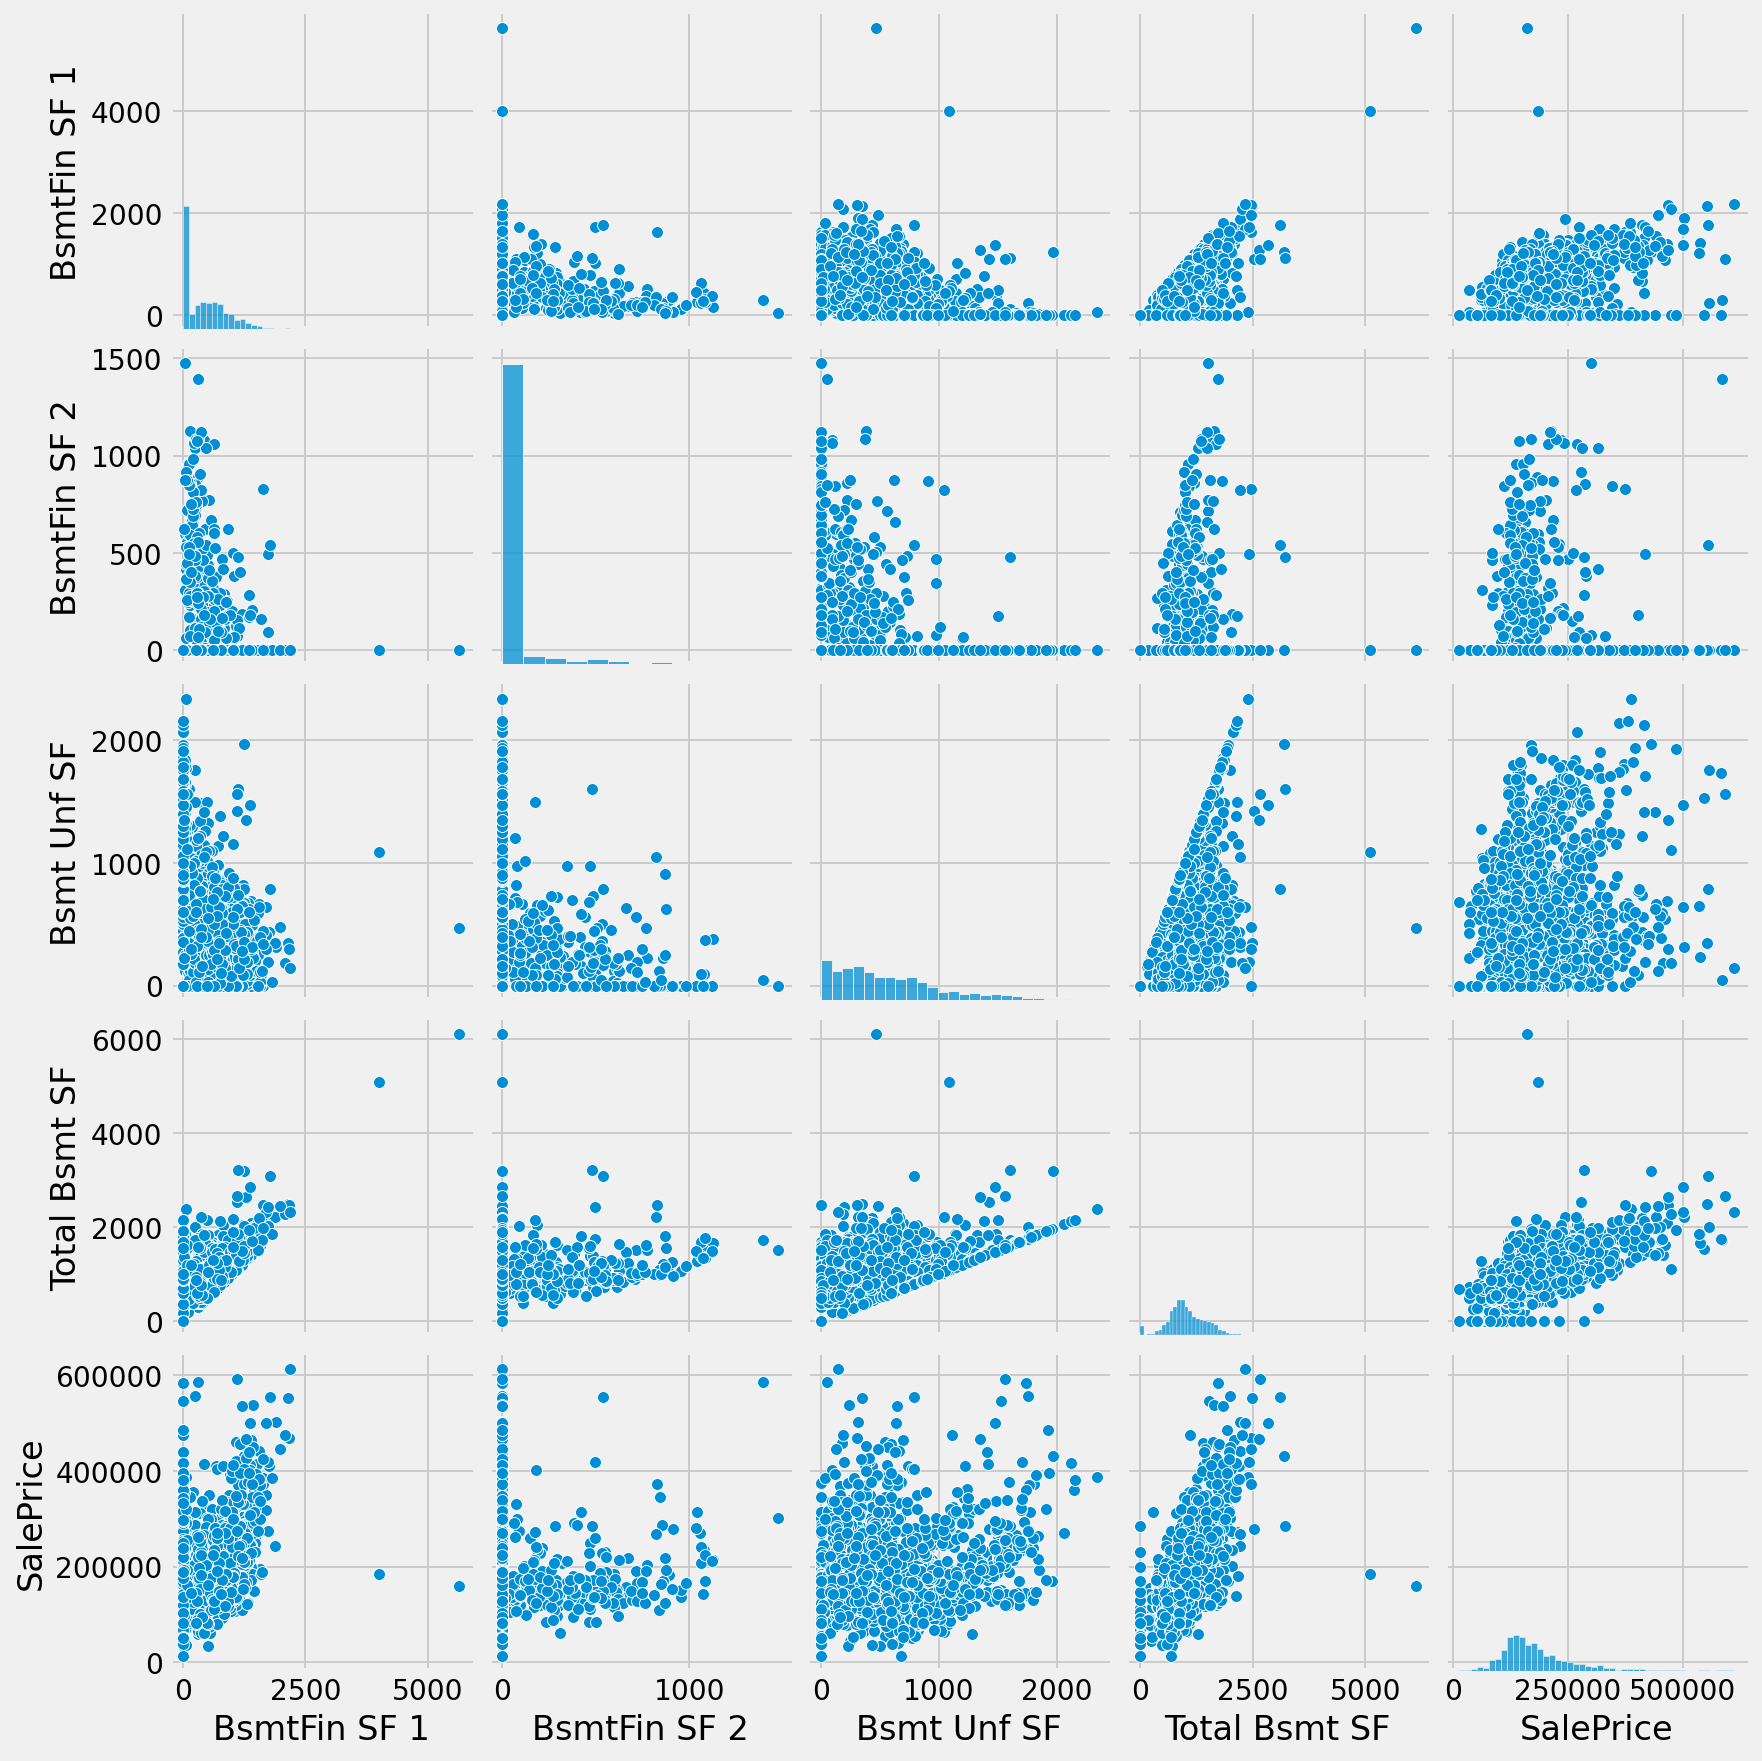

In [49]:
# Pairplot for basement features.
sns.pairplot(train[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'SalePrice']], palette='tab10');


Effectively only 'Total Bsmt SF' has a direct correlation with 'SalePrice' as can be seen from the pairplot. However based on intuition, 'Bsmt Unf SF' will have an effect on 'Total Bsmt SF' so I will engineer a new feature for 'Bsmt Liv Area' = Total Bsmt SF - Bsmt Unf SF. I will keep columns on quality, condition and exposure but drop the rest of the information about basement.  


In [50]:
# Creating new column 'Bsmt Liv Area' which is the difference between the Total Bsmt SF and Bsmt Unf SF.
train['Bsmt Liv Area'] = train['Total Bsmt SF'] - train['Bsmt Unf SF']
train.head() # Check that it works.

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,SalePrice,Bsmt Liv Area
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,44,0,0,0,0,NaN,NaN,0,130500,533.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,74,0,0,0,0,NaN,NaN,0,220000,637.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,52,0,0,0,0,NaN,NaN,0,109000,731.0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,NaN,NaN,0,174000,0.0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,59,0,0,0,0,NaN,NaN,0,138500,0.0


In [51]:
# Dropping all extra info about basement.
train = train.drop(columns = ['BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF'])

In [52]:
# Checking to see if all missing values have been managed accordingly --> still 1 left.
train['Bsmt Liv Area'].isna().sum()

1

My calculated guess is that there isn't even a basement for this house since it couldn't calculate the 'Bsmt Liv Area' according to the formula. So I'll impute a zero to represent no basement living area. 

In [53]:
# Impute zero.
train['Bsmt Liv Area'] = train['Bsmt Liv Area'].replace(np.nan, 0)

In [54]:
# Check that this column is complete.
train['Bsmt Liv Area'].isna().sum()

0

<u>Alley</u>  

The missing values are because there are no alley access which is simply because there is no alley in the first place. So I will impute 0 into these cells since there are technically no (=0) alleys. Eventually I will one hot encode this column to become 0 for no alley and 1 for alley.  


In [55]:
# Alley --> replace nan with 0.
train['Alley'] = train['Alley'].replace(np.nan, 0)

In [56]:
# Create a new column to binarize whether there is (1) or is no (0) alley.
def alley(type):
    if type == 0: 
        return 0
    else: 
        return 1

# Apply it to a new column.
train['Have alley'] = train['Alley'].apply(alley)

In [57]:
# Then proceed to drop 'alley' column.
train = train.drop(columns = ['Alley'])

<u>Fence, Fireplace Qu, Mas Vnr Type, Mas Vnr Area</u>  

Similarly, the missing values in these columns will be imputed with 0 as it implies none of that feature.

In [58]:
# Fence --> replace nan with 0 since there are no fences.
train['Fence'] = train['Fence'].replace(np.nan, 0)

In [59]:
# Fireplace Qu --> replace nan with 0 since there are no fireplaces.
train['Fireplace Qu'] = train['Fireplace Qu'].replace(np.nan, 0)

In [60]:
# Mas Vnr Area --> replace nan with 0 since there is no such feature in these rows.
train['Mas Vnr Area'] = train['Mas Vnr Area'].replace(np.nan, 0)

In [61]:
# Mas Vnr Type --> replace nan with 0 since there is no such feature in these rows.
train['Mas Vnr Type'] = train['Mas Vnr Type'].replace(np.nan, 0)

<u>Garage</u>  

Quite a few columns detailing information about the garage. In my opinion, all that a buyer wants to know is whether there is a garage and perhaps how big it is. Nevertheless, I'll pull out those garage-related columns to draw a heatmap to see if I can pick out any observations.

In [62]:
# Pulling out only the garage related columns.
garageinfo = train[['Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond']]
garageinfo.head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA


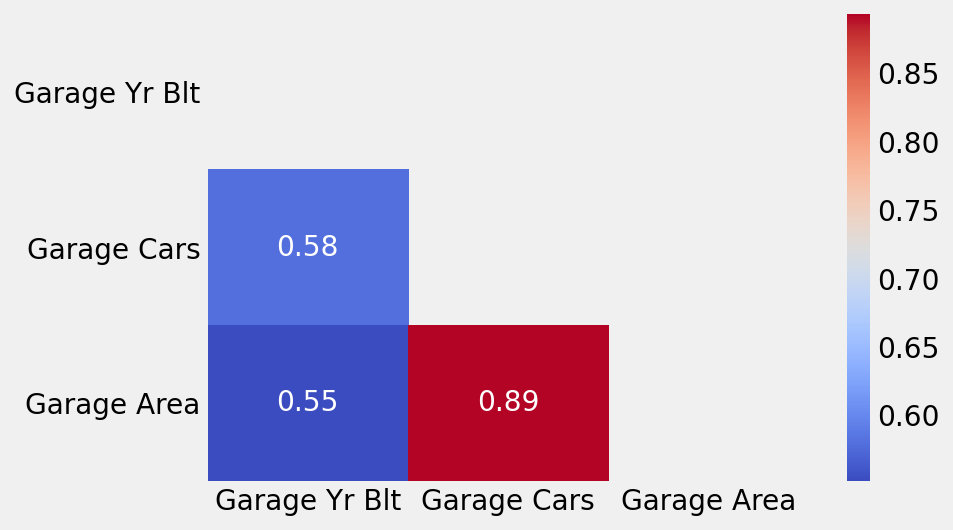

In [63]:
# Drawing a heatmap.
mask = np.zeros_like(garageinfo.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(garageinfo.corr(), mask = mask, annot = True, cmap='coolwarm');

Not surprisingly, garage area is highly correlated to the number of cars the garage has space for. To reduce multicolinearity, I will only keep 'Garage Area' to be able to tell the size and create a new column just to indicate 0 for no garage and 1 for garage.

In [64]:
# Dropping all extra info about garage except 'Garage Area', quality and condition.
train = train.drop(columns = ['Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars'])

In [65]:
# Create a new column to binarize whether there is (1) or is no (0) garage.
# Define my argument.
def garage(area):
    if area == 0: 
        return 0
    else: 
        return 1

# Apply it to a new column.
train['Garage'] = train['Garage Area'].apply(garage)

In [66]:
# Checking through to see the above functions worked.
train[train['Garage'] == 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,SalePrice,Bsmt Liv Area,Have alley,Garage
28,2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,119600,0.0,0,0
53,330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,76000,176.0,0,0
65,2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,147000,206.0,0,0
79,2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,...,176,0,0,0,NaN,0,129850,0.0,0,0
101,2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NaN,0,86000,348.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,Reg,Low,AllPub,...,0,0,0,0,NaN,0,139000,0.0,0,0
2010,2880,911175410,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,51689,0.0,0,0
2027,2628,535456010,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,119000,0.0,0,0
2039,2288,923228220,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NaN,0,93900,384.0,0,0


For the rest of the missing values, I'll be imputing zero since the missing values imply null of the feature.

In [67]:
# Imputing zero to the rest of the missing values since they do not exist in these rows.
train['Garage Area'] = train['Garage Area'].replace(np.nan, 0)
train['Bsmt Qual'] = train['Bsmt Qual'].replace(np.nan, 0)
train['Bsmt Cond'] = train['Bsmt Cond'].replace(np.nan, 0)
train['Bsmt Exposure'] = train['Bsmt Exposure'].replace(np.nan, 0)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].replace(np.nan, 0)
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].replace(np.nan, 0)
train['Garage Qual'] = train['Garage Qual'].replace(np.nan, 0)
train['Garage Cond'] = train['Garage Cond'].replace(np.nan, 0)
train['Misc Feature'] = train['Misc Feature'].replace(np.nan, 0)

<u>Lot Frontage</u>  

I would think information about lot frontage is important so I will impute it with the mean as it would be most representative. 

In [68]:
# Imputing the missing values in 'Lot Frontage' with the mean.
train['Lot Frontage'] = train['Lot Frontage'].fillna(round(train['Lot Frontage'].mean(), 1))

In [69]:
# Confirming that the missing values have been managed.
train['Lot Frontage'].isna().sum()

0

In [70]:
# Confirming that there are no more missing values. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [71]:
# Rename so I don't overwrite the original data set.
cleaned_train = train

In [72]:
# To export the data.
import os
if not os.path.exists('output'):
    os.makedirs('output')
cleaned_train.to_csv('output/cleaned_train.csv')

### EDA

Earlier when I did a describe, I could see oddities in the min and max of some features. Here I look deeper into each to see if there are outliers I need to manage.

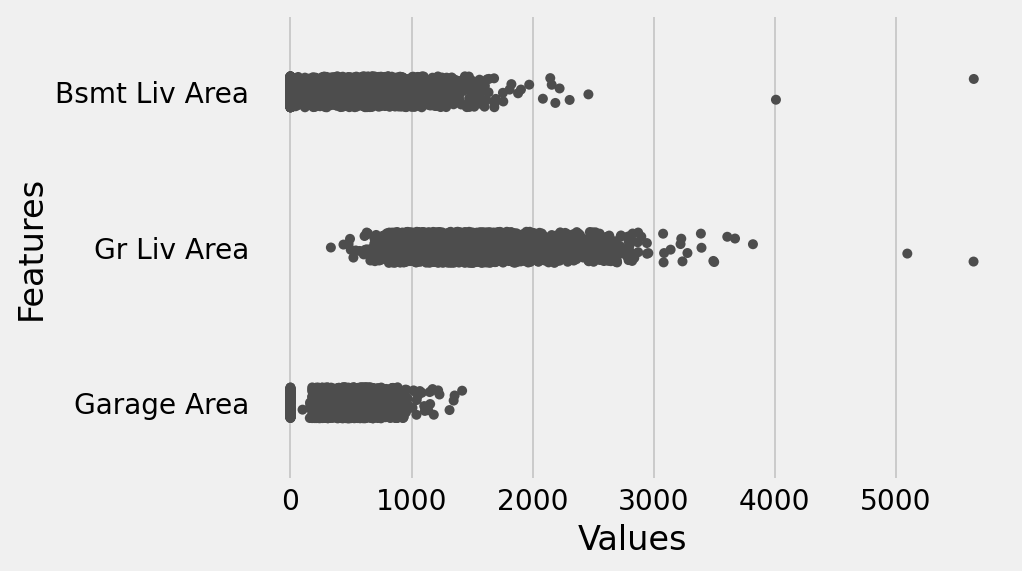

In [73]:
# To filter the columns where the min and max values differ vastly.
poss_outliers = train[['Bsmt Liv Area', 'Gr Liv Area', 'Garage Area']]
# To melt the data.
melted_frame = pd.melt(poss_outliers)
# To draw stripplot.
sns.stripplot(x="value", y="variable", data=melted_frame, color=".3")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

There are indeed outliers in 'Bsmt Liv Area' and 'Gr Liv Area'.

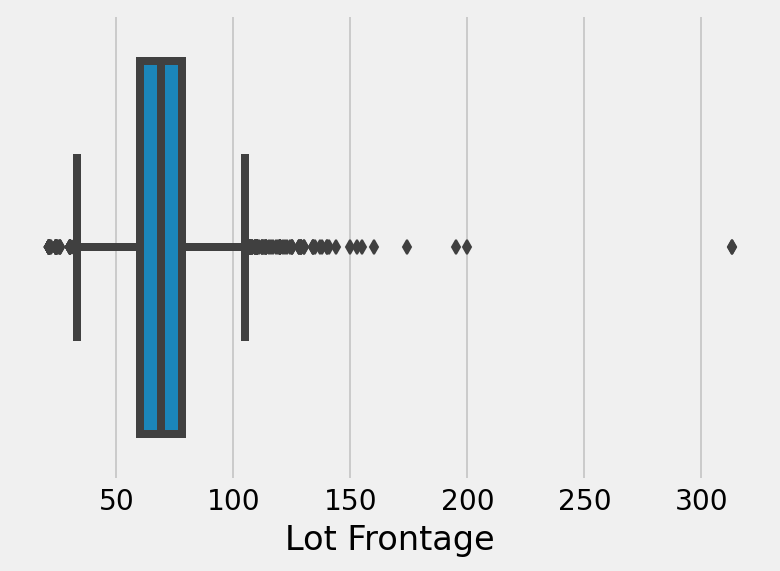

In [74]:
# Plotting this separately as the scale is different from those above and will likely be missed out as having outlier.
sns.boxplot(x=train['Lot Frontage']);

Also there is an outlier. 

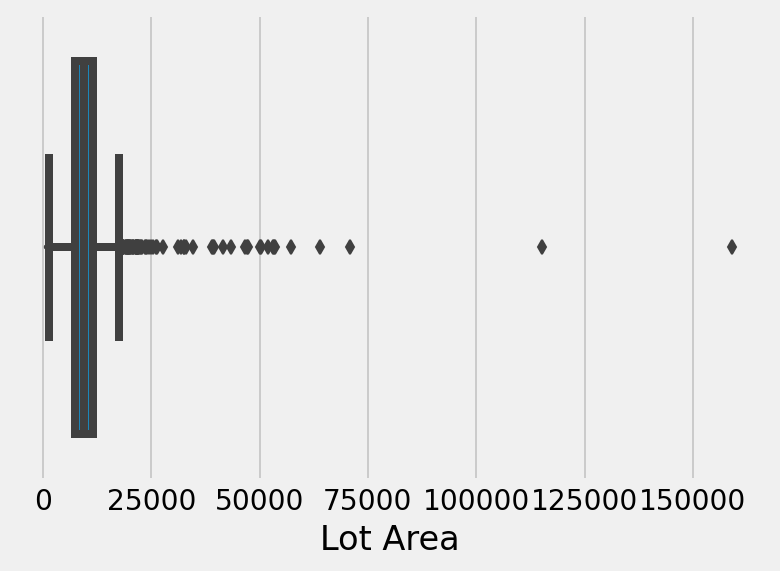

In [75]:
# Similarly, scale is different so am plotting separately.
sns.boxplot(x=train['Lot Area']);

There are outliers.

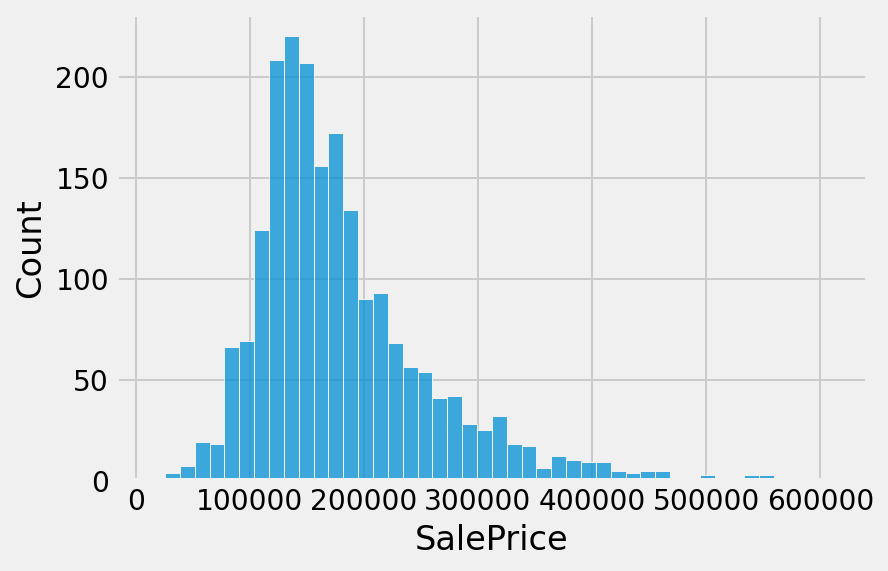

In [76]:
# Due to the outliers above that are factors that affect 'SalePrice', I decided to check on the values of the SalePrice.
sns.histplot(data=train, x="SalePrice");

Sure enough, it has extremely high values possibly due to those factors that significantly influenced the SalePrice. But I won't drop anything here because there could be special reasons why the sale price is so high. 

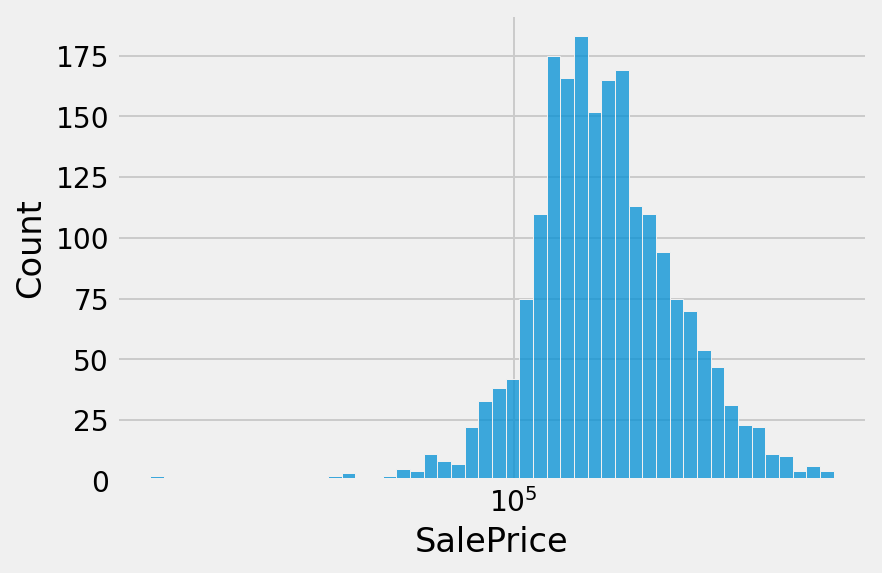

In [77]:
# Logging saleprice to normalize it.
sns.histplot(data=train, x="SalePrice", log_scale=True);

I'm just trying out this log function to observe how data is normalized. Anyway later when modelling, I will be standard scaling the variables so this right skew of saleprice isn't too big a concern.

In [78]:
# Checking to see if the outlier for the saleprice is accountable for the outlier values in the other features. 
train[train['SalePrice'] == 611657.0][['Lot Frontage', 'Lot Area', 'Bsmt Liv Area', 'Gr Liv Area', 'Garage Area', 'SalePrice']]

,Lot Frontage,Lot Area,Bsmt Liv Area,Gr Liv Area,Garage Area,SalePrice
1671,100.0,12919,2188.0,2364,820.0,611657


It is not. So there are various outliers among these few columns that need to be tackled.

In [79]:
# Checking to see if the outliers for Bsmt Liv Area is the outliers for any others. 
train[train['Bsmt Liv Area'] >= 4000][['Lot Frontage', 'Lot Area', 'Bsmt Liv Area', 'Gr Liv Area', 'Garage Area', 'SalePrice']]

,Lot Frontage,Lot Area,Bsmt Liv Area,Gr Liv Area,Garage Area,SalePrice
960,313.0,63887,5644.0,5642,1418.0,160000
1885,128.0,39290,4010.0,5095,1154.0,183850


From this, we can tell Row 960 is the data responsible for the outlier in various features. So it would be justified to drop this row since it is skewing the data in quite a few columns. Row 1885 is responsible for outliers in both Bsmt Liv Area and Gr Live Area so drop too.

In [80]:
# Drop rows.
train.drop([960, 1885], axis=0, inplace=True)

In [81]:
# Having a look at the 2 outliers for Lot Area. 
train[train['Lot Area'] >= 100000.0][['Lot Frontage', 'Lot Area', 'Bsmt Liv Area', 'Gr Liv Area', 'Garage Area', 'SalePrice']]

,Lot Frontage,Lot Area,Bsmt Liv Area,Gr Liv Area,Garage Area,SalePrice
471,69.1,159000,697.0,2144,389.0,277000
694,69.1,115149,1219.0,1824,739.0,302000


Both have extremely large lot areas and imputed mean for lot frontage. This gives me reason to believe that it could genuinely be a data entry error so I'm dropping too. 

In [82]:
# Drop rows.
train.drop([471, 694], axis=0, inplace=True)

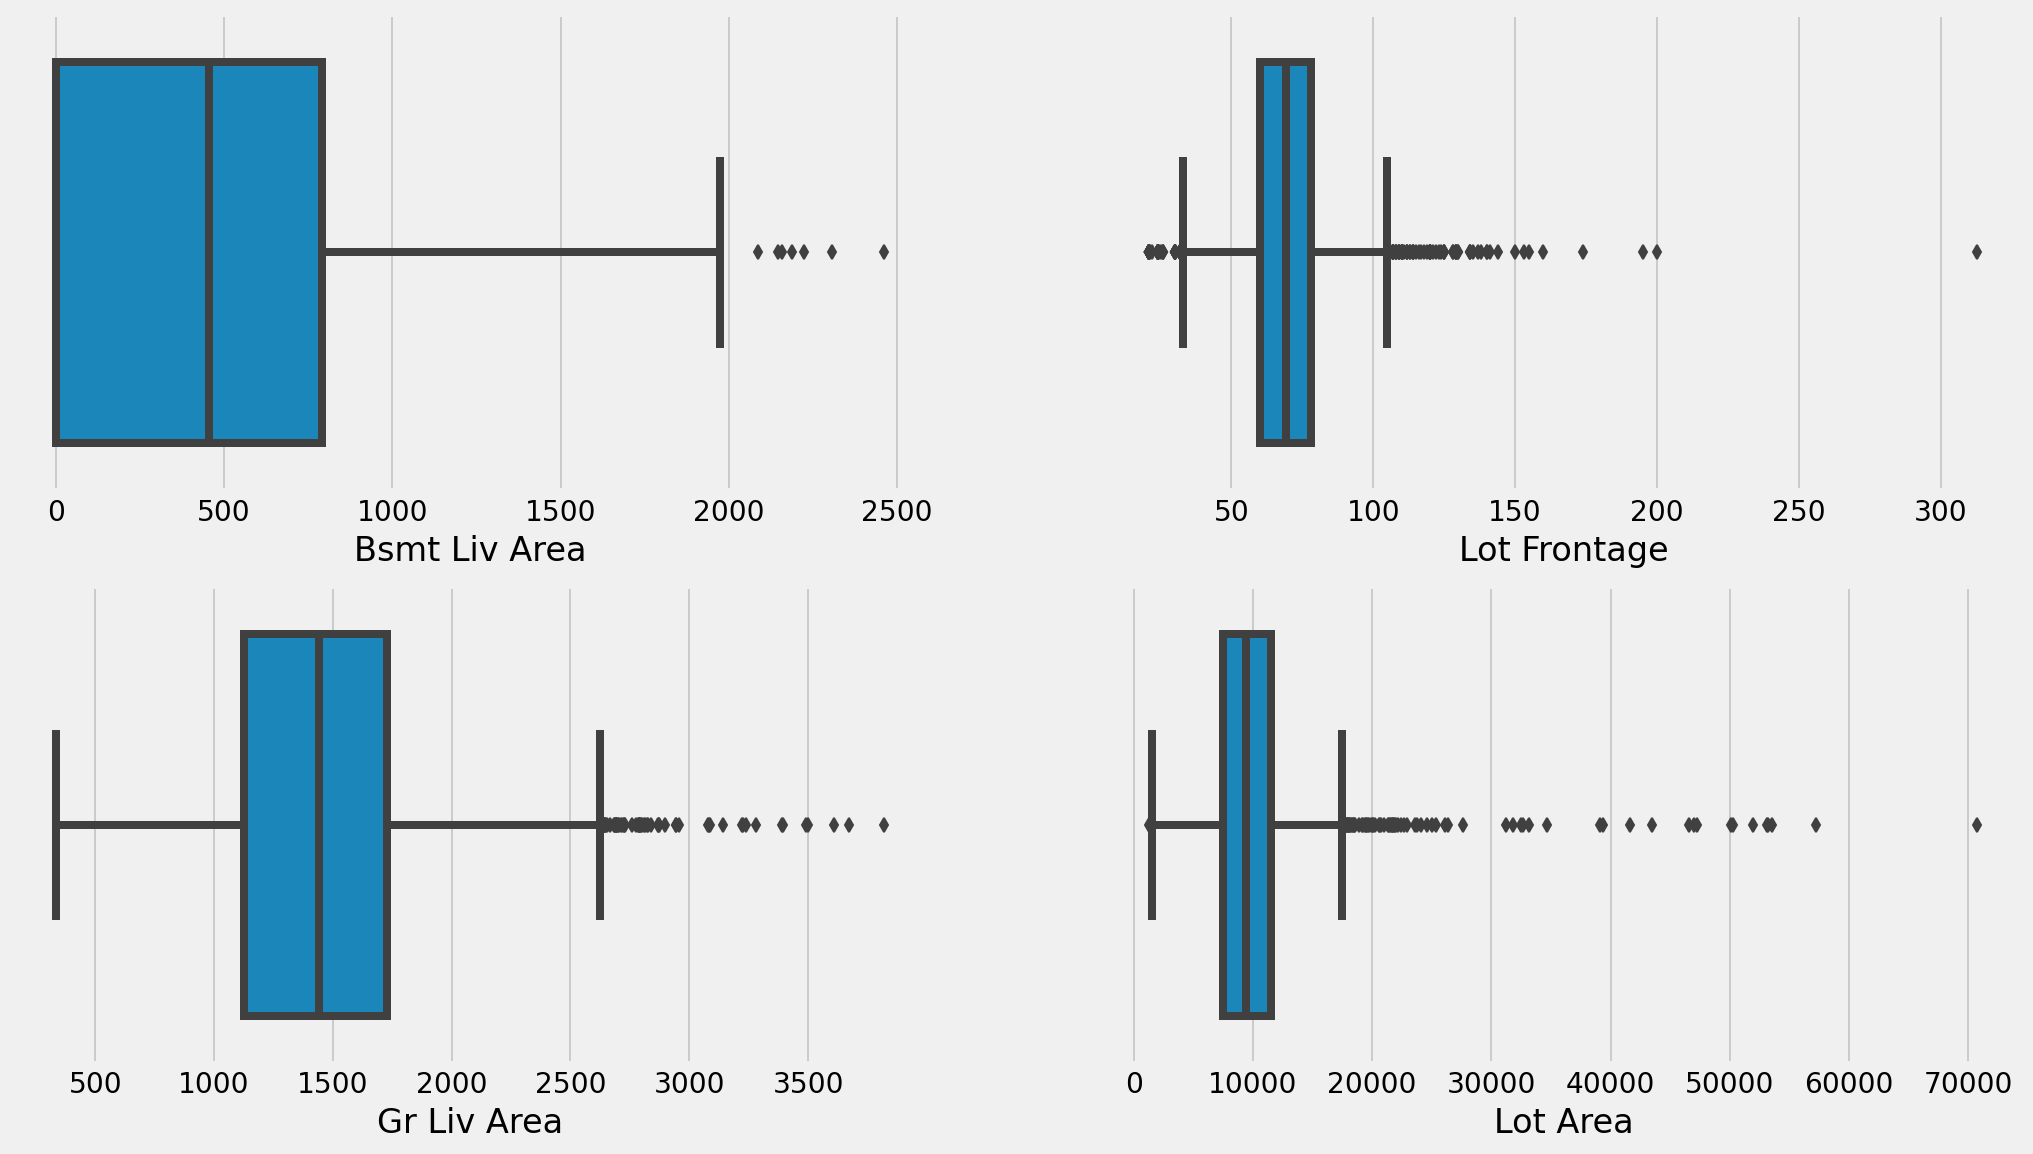

In [83]:
# Doing a check on the plots after dealing with the outliers. 
plt.figure(figsize = (16, 9))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x=train['Bsmt Liv Area'])
ax2 = plt.subplot(2, 2, 3)
ax2 = sns.boxplot(x=train["Gr Liv Area"])

ax3 = plt.subplot(2, 2, 2)
ax3 = sns.boxplot(x=train["Lot Frontage"])
ax4 = plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x=train["Lot Area"])


In [84]:
# Still exist outliers.
train[train['Lot Frontage']>300]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,SalePrice,Bsmt Liv Area,Have alley,Garage
1335,1266,535427070,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,...,0,0,0,0,0,0,242000,425.0,0,1


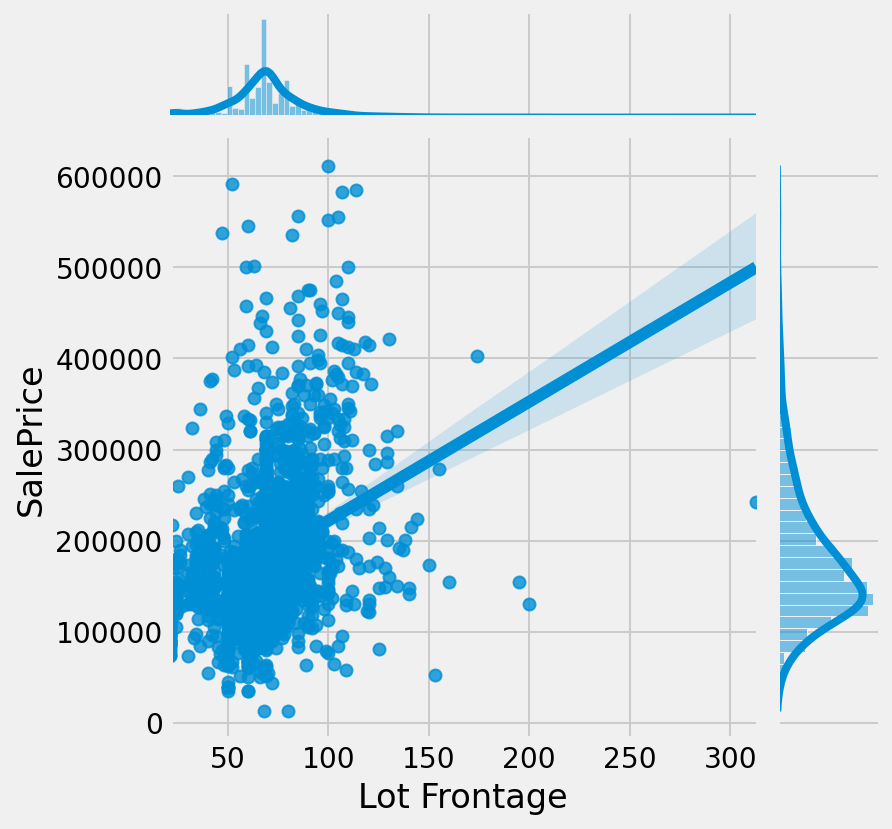

In [87]:
# Having a visual of the linear relationship between lot frontage and saleprice which the above boxplot couldn't show.
sns.jointplot(x=train['Lot Frontage'],y=train['SalePrice'],kind='reg');

In [88]:
train[train['Lot Area']>70000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,SalePrice,Bsmt Liv Area,Have alley,Garage
1854,2767,906475200,20,RL,62.0,70761,Pave,IR1,Low,AllPub,...,0,0,0,0,0,0,280000,655.0,0,1


In [89]:
# Drop rows.
train.drop([1335, 1854], axis=0, inplace=True)

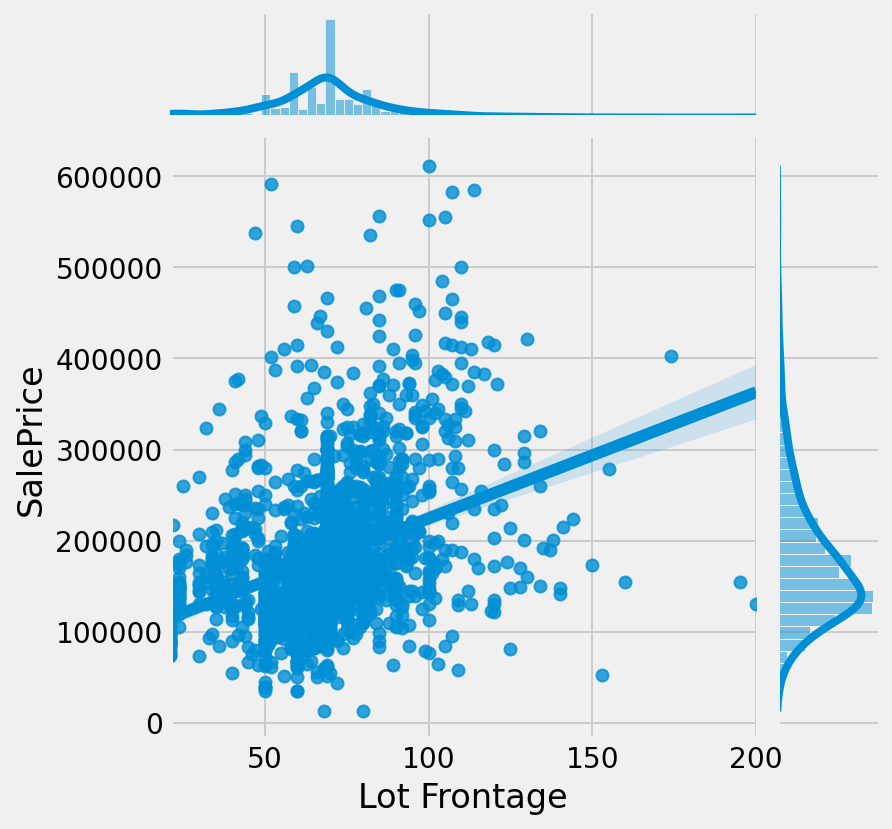

In [90]:
# Relooking the visual after the outlier has been dropped; relationship more linear.
sns.jointplot(x=train['Lot Frontage'],y=train['SalePrice'],kind='reg');

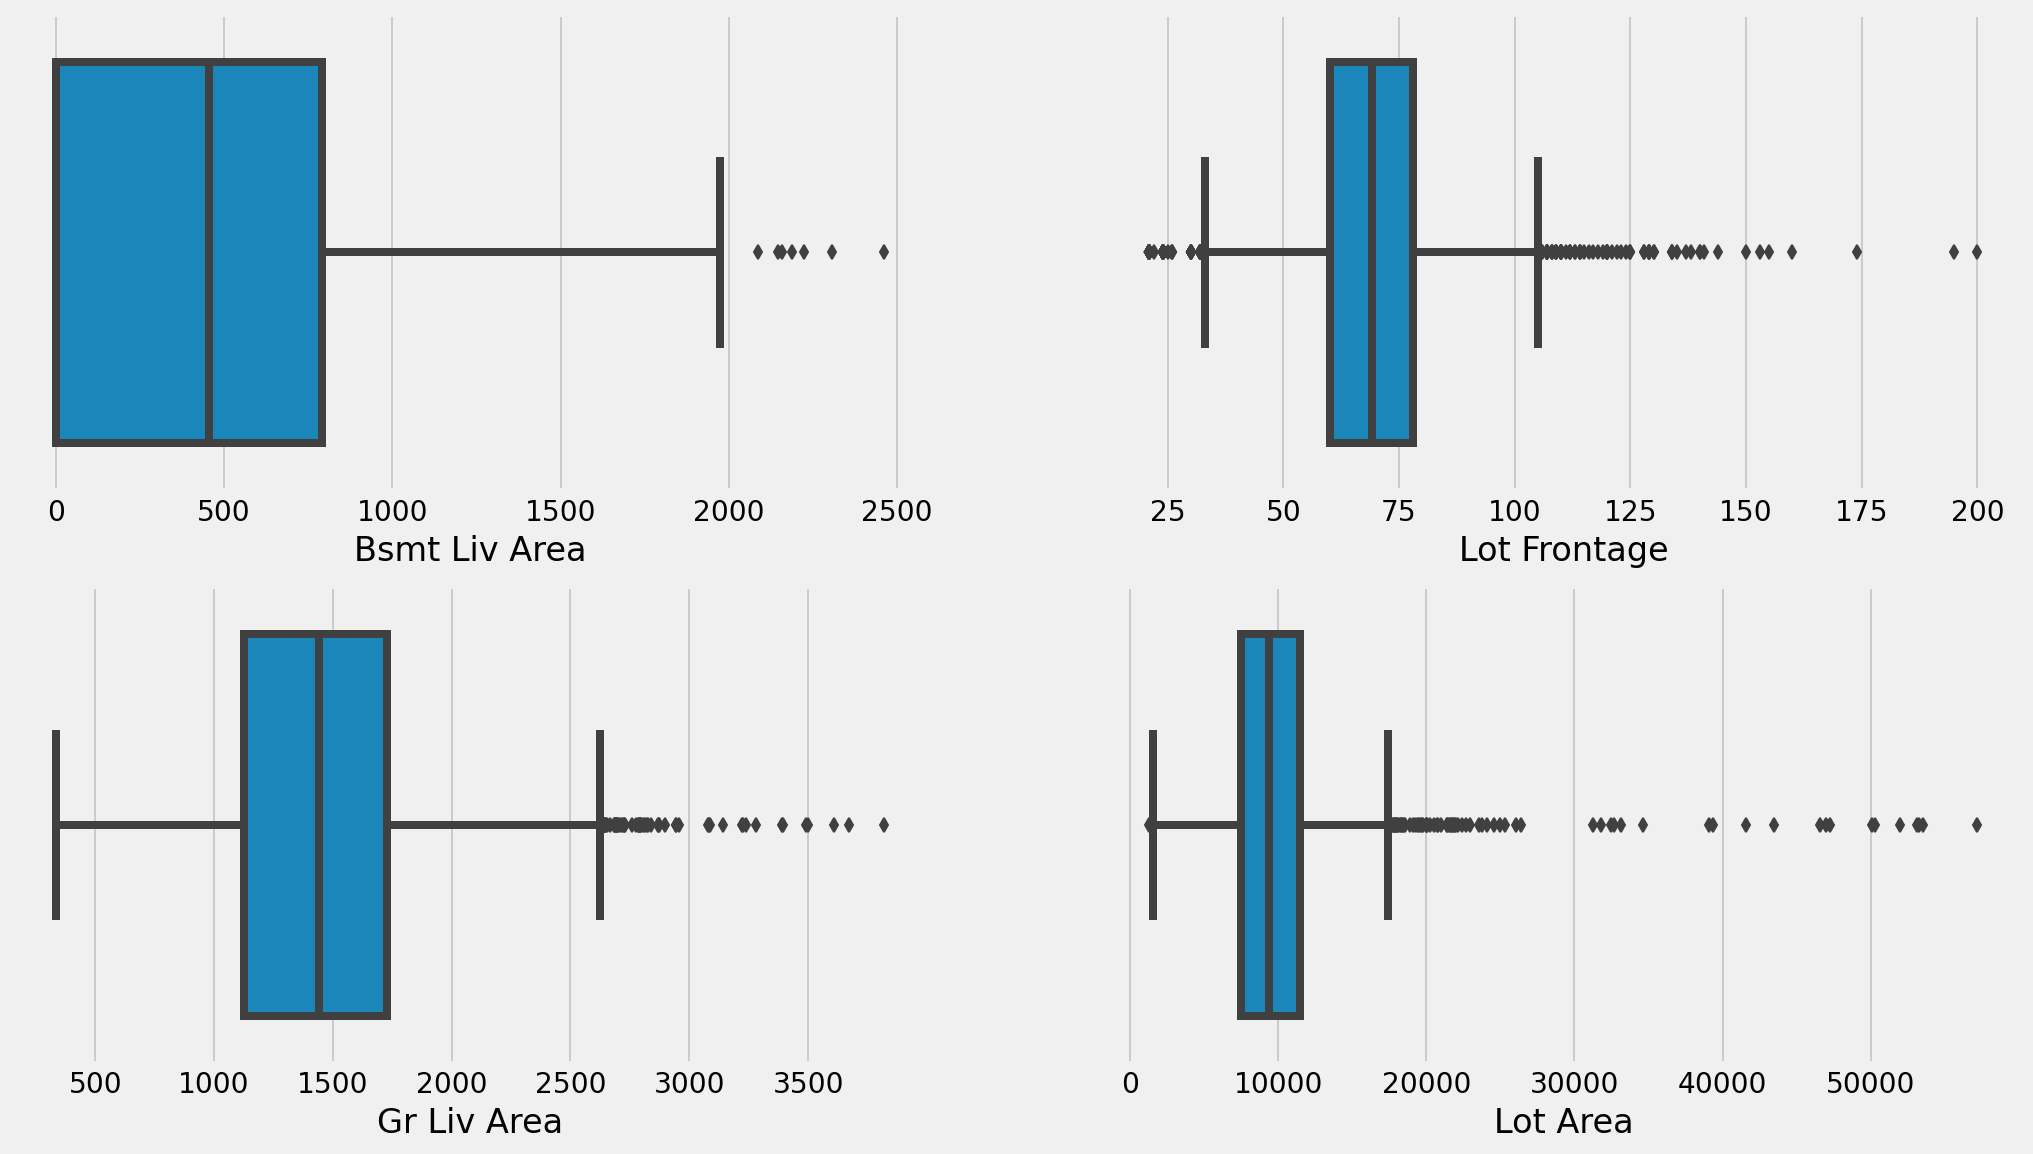

In [41]:
# Doing a check on the plots after dropping the outliers. 
plt.figure(figsize = (16, 9))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x=train['Bsmt Liv Area'])
ax2 = plt.subplot(2, 2, 3)
ax2 = sns.boxplot(x=train["Gr Liv Area"])

ax3 = plt.subplot(2, 2, 2)
ax3 = sns.boxplot(x=train["Lot Frontage"])
ax4 = plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x=train["Lot Area"])

Distributions seem much better now. Although for both Lot Frontage and Lot Area, data is left skewed, it will do as we do not want to drop anymore data unnecessarily.

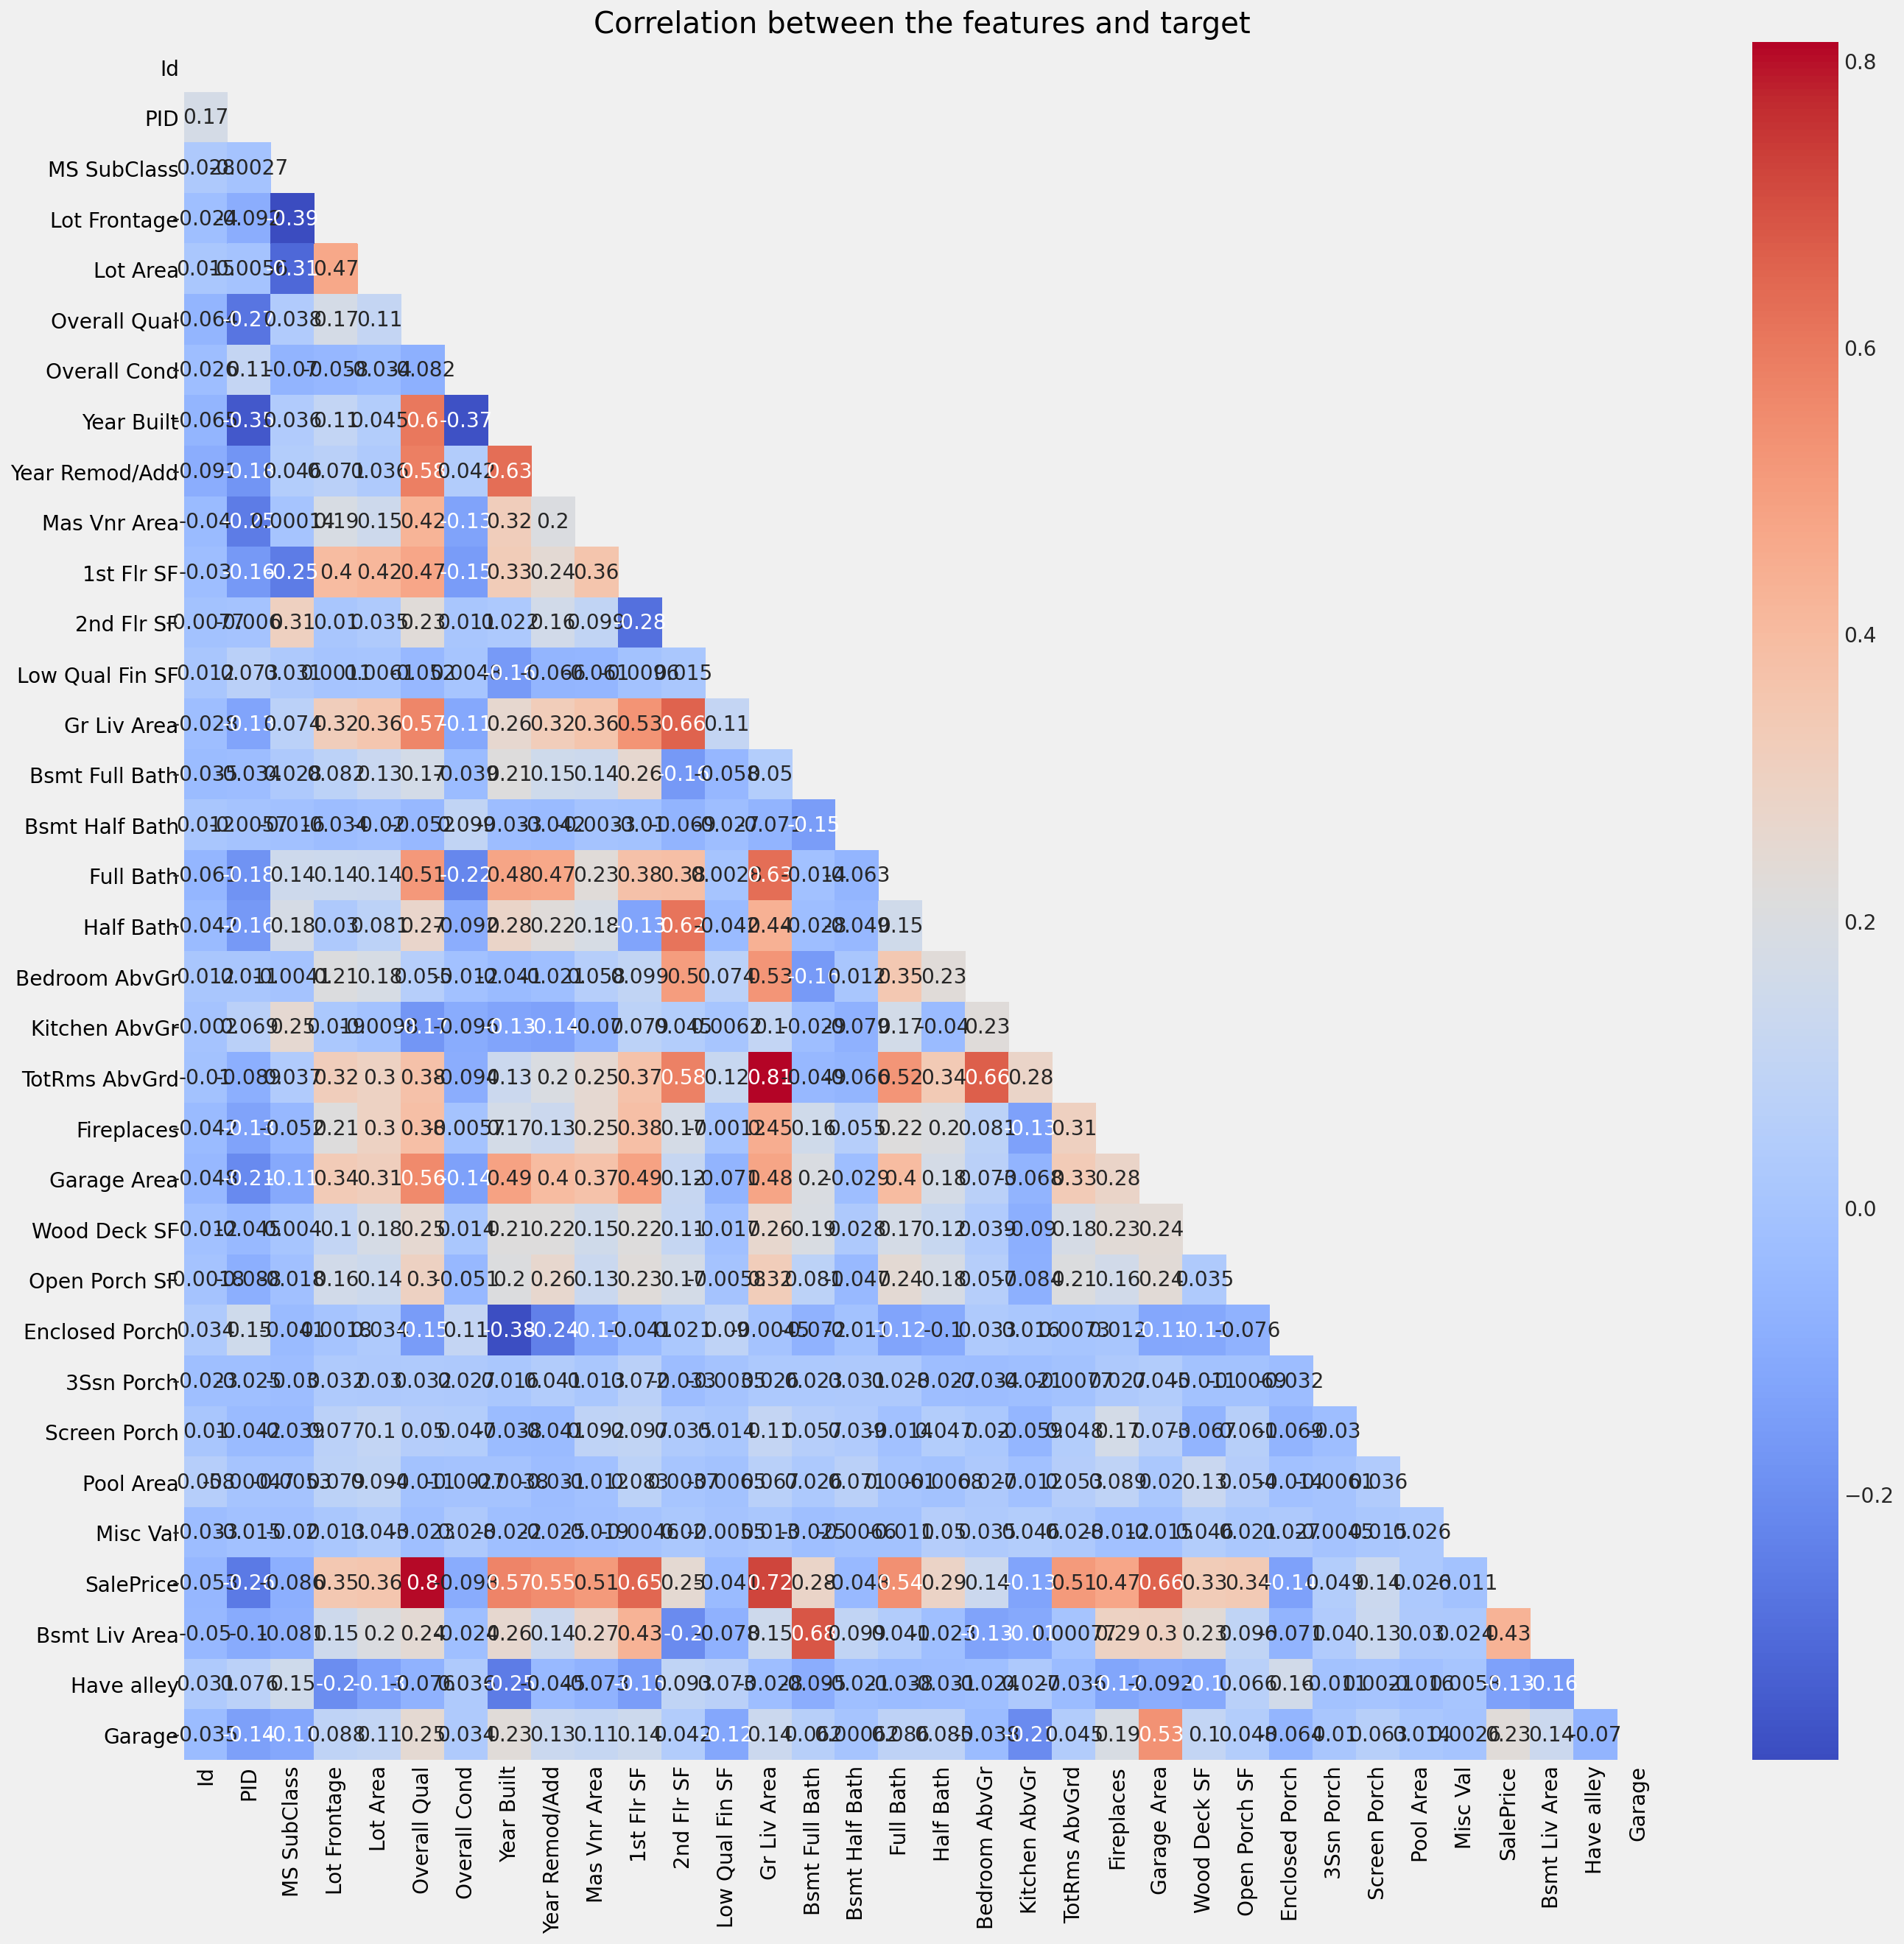

In [42]:
# Doing a heatmap to observe any possible correlations at this point.
plt.figure(figsize=(20,20))

plt.title('Correlation between the features and target');

mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

# Plot the correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(train.corr(), mask = mask, cmap='coolwarm',annot = True)

Preliminary observations show that saleprice is significantly correlated with Overall Quality, Year Built, Year Remod/ Add, Mas Vnr Area, 1st Flr SF, Gr Liv Area, Full Bath, TotRms AbvGrd and Garage Area.  

In [43]:
cleaned_train_no_outlier = train

In [44]:
# To export the data.
cleaned_train_no_outlier.to_csv('output/cleaned_train_no_outlier.csv')